In [2]:
%cd "E:\Desktop2\_code"
    

E:\Desktop2\_code


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(len(data))
data.info()

768
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#separate features and labels
X = data.iloc[:,0:8].values
y = data.iloc[:,8].values

#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = None) #set to none to see the variance explained to choose components
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance



array([0.26297633, 0.21800457, 0.12476677, 0.11226181, 0.09369692,
       0.08228412, 0.05405411, 0.05195538])

In [ ]:
array([ 0.25937072,  0.21459004,  0.12608218,  0.11376638,  0.09528477,
        0.08698106,  0.05264971,  0.05127514])b

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predict the test set values
y_pred = classifier.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[87, 11],
       [31, 25]], dtype=int64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#setting pca components to 4
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
               
#predict the test set
y_pred = classifier.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[92,  7],
       [25, 30]], dtype=int64)

Non linear classification SVM



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Create classifier object
from sklearn.svm import SVC
classifier_svm_kernel = SVC(C=5.0 , kernel = 'rbf', gamma = 0.12, tol=0.00001)
classifier_svm_kernel.fit(X_train, y_train)

#Predict the result of test values
y_pred = classifier_svm_kernel.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[77, 20],
       [23, 34]], dtype=int64)

In [18]:
#comparing the prediction with the actual results
comparison = pd.DataFrame(y_test,columns=['y_test'])
comparison['y_predicted'] = y_pred
comparison.head(5)

,y_test,y_predicted
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [19]:
#implementing k-fold cross validation with a grid search, to figure hiperparameters along with accuracy statistics, precision and recall. applying ten-fold cross validation
#k-fold validation here
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_svm_kernel, X=X_train, y=y_train, cv=10)
accuracies

array([0.74603175, 0.75806452, 0.74193548, 0.78688525, 0.80327869,
       0.72131148, 0.80327869, 0.80327869, 0.7704918 , 0.75409836])

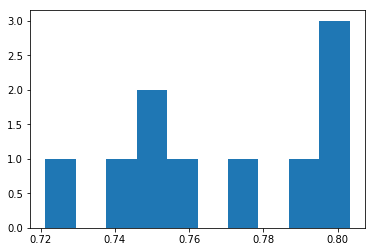

In [20]:
plt.hist(accuracies)
plt.show()